### Twitter Analysis



In [1]:
import tweepy
import pandas as pd
import numpy as np
import json
import re
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

**Task1**: Authentication

In [2]:
# Your credentials go here ...

consumer_key = '...'
consumer_key_secret = '...'
access_token = '...'
access_token_secret = '...'

auth = tweepy.OAuthHandler(consumer_key, consumer_key_secret)

auth.set_access_token(access_token, access_token_secret)

api = tweepy.API(auth)

**Task 1**
Collect 400 tweets from two different Twitter users (Australian politicians), 200 from each.  You should try to find two politicians where you would expect there to be some noticeable differences in their tweets.


#### Julian Hill MP (@JulianHillMP) 


In [3]:
max_tweets = 200
screen_name = '@JulianHillMP'

tweets_JH = api.user_timeline(screen_name = screen_name,
                             tweet_mode = 'extended',
                             count = max_tweets)

__Writing all the tweets for Julian Hill MP .json file__

In [4]:
list_of_dicts_JH = []
for tweet in tweets_JH:
    list_of_dicts_JH.append(tweet._json)
#print(list_of_dicts_JH)

with open('Files/JulianHillMP_tweet.json', mode = 'w') as file:
    file.write(json.dumps(list_of_dicts_JH , indent = 4))

#### Scott Morrison (@ScottMorrisonMP) 

In [5]:
max_tweets = 200
screen_name = '@ScottMorrisonMP'

tweets_SM = api.user_timeline(screen_name = screen_name,
                           tweet_mode = 'extended',
                           count = max_tweets)

__Writing all the tweets for Scott Morrison  .json file__

In [6]:
list_of_dicts_SM = []
for tweet in tweets_SM:
    list_of_dicts_SM.append(tweet._json)
#print(list_of_dicts_SM)

with open('Files/ScottMorrisonMP_tweet.json', mode = 'w') as file:
    file.write(json.dumps(list_of_dicts_SM , indent = 4))

In [7]:
#JulianHillMP
list1 = []
with open('Files/JulianHillMP_tweet.json', encoding = 'utf-8', mode = 'r') as file:
        list_of_dicts_JH = json.load(file)
        for dict in list_of_dicts_JH:
             list1.append({'user':str(dict['user']['name']),
                          'full_text':str(dict['full_text']),
                          'posting_time':dict['created_at'],
             })
print(list1[0])

{'user': 'Julian Hill MP', 'full_text': '@DougCameron51 @JoshFrydenberg Same level of courage as Peter Costello. But a far far worse Treasurer - record debt, still in deficit and a weak economy - and that was before COVID!', 'posting_time': 'Sat Oct 16 02:43:22 +0000 2021'}


In [8]:
#JulianHillMP
df_JH = pd.DataFrame(list1 , columns = ['user','full_text', 'posting_time'])
#df_JH

__ScottMorrisonMP__

In [9]:
#ScottMorrisonMP
list2 = []
with open('Files/ScottMorrisonMP_tweet.json', encoding = 'utf-8', mode = 'r') as file:
        list_of_dicts_SM = json.load(file)
        for dict in list_of_dicts_SM:
            list2.append({'user':str(dict['user']['name']),
                          'full_text':str(dict['full_text']),
                          'posting_time':dict['created_at'],
             })

In [10]:
#ScottMorrisonMP
df_SM = pd.DataFrame(list2 , columns = ['user','full_text', 'posting_time'])
#df_SM

__Merging df_JH and df_SM tables into one df__

In [11]:
df = pd.concat([df_JH,df_SM], axis=0)
df = df.reset_index(drop=True)
df.head(5)

,user,full_text,posting_time
0,Julian Hill MP,@DougCameron51 @JoshFrydenberg Same level of c...,Sat Oct 16 02:43:22 +0000 2021
1,Julian Hill MP,"RT @DougCameron51: What a boring, pathetic pis...",Sat Oct 16 02:42:33 +0000 2021
2,Julian Hill MP,So 8 years of failure &amp; missed opportuniti...,Fri Oct 15 20:31:24 +0000 2021
3,Julian Hill MP,RT @SenKatyG: The Morrison Government wants us...,Fri Oct 15 06:19:32 +0000 2021
4,Julian Hill MP,"Ummm, Matty, you do know how that story ends r...",Thu Oct 14 23:49:50 +0000 2021


__Writng all the tweets for each of the two users, as a single .csv file__

In [12]:
import csv

#csv path
FILE_PATH = "C:/Users/piyak/Github/my-project/Twitter_Analysis/Files/tweets.csv"

#Save dataframe to csv
df.to_csv(FILE_PATH)

**Task 2** Use pandas to plot the posting times of the tweets for the two users in one bar chart; the aim of the plot is to distinguish the two users.

In [13]:
#Extract posting hour from posting_time
df_JH['posting_time'] = pd.to_datetime(df_JH['posting_time'])
df_JH['hour'] = df_JH['posting_time'].dt.hour
df_SM['posting_time'] = pd.to_datetime(df_SM['posting_time'])
df_SM['hour'] = df_SM['posting_time'].dt.hour

In [14]:
JH= df_JH['hour'].value_counts().sort_index().to_frame('JH')
JH['hour'] = JH.index
JH.reset_index(drop=True, inplace=True)
JH = JH[['hour', 'JH']]
#JH

In [15]:
SM= df_SM['hour'].value_counts().sort_index().to_frame('SM')
SM['hour'] = SM.index
SM.reset_index(drop=True, inplace=True)
SM = SM[['hour', 'SM']]
#SM

In [16]:
all_hour = pd.merge(JH, SM,on = ['hour'], how = 'outer')
all_hour.fillna(0, inplace=True)
all_hour['JH'] = all_hour['JH']. astype(int)
all_hour['SM'] = all_hour['SM']. astype(int)
all_hour.set_index('hour', inplace=True)
all_hour = all_hour.sort_index()
all_hour

,JH,SM
hour,,
0,4,9
1,5,10
2,10,15
3,10,12
4,16,13
5,12,20
6,11,12
7,13,15
8,22,7


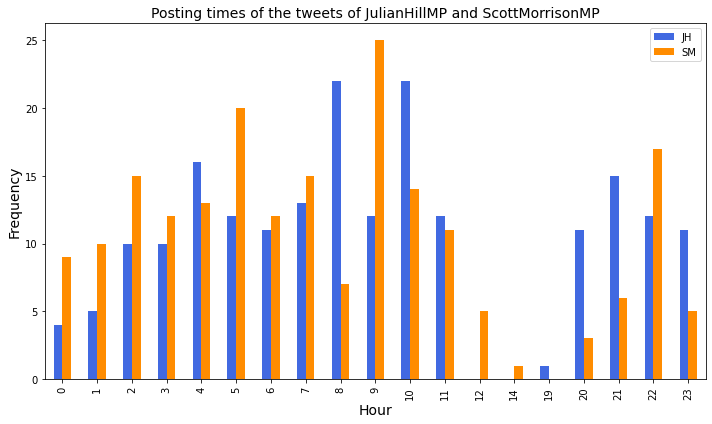

In [17]:
colors = ['royalblue', 'darkorange']
all_hour.plot(kind='bar', figsize=(10,6), color = colors)
plt.title('Posting times of the tweets of JulianHillMP and ScottMorrisonMP', fontsize = 14)
plt.xlabel('Hour', fontsize = 14)
plt.ylabel('Frequency', fontsize = 14)
plt.tight_layout()

Julian Hill and Scott Morrison most tweet in the morning, both of them also less tweet in the afternoon and they tweet more in the evening.

**Task 3** Use pandas to construct one bar chart of the proportions of tweets for each of the two users that contain pictures or links.

In [18]:
df.head(5)

,user,full_text,posting_time
0,Julian Hill MP,@DougCameron51 @JoshFrydenberg Same level of c...,Sat Oct 16 02:43:22 +0000 2021
1,Julian Hill MP,"RT @DougCameron51: What a boring, pathetic pis...",Sat Oct 16 02:42:33 +0000 2021
2,Julian Hill MP,So 8 years of failure &amp; missed opportuniti...,Fri Oct 15 20:31:24 +0000 2021
3,Julian Hill MP,RT @SenKatyG: The Morrison Government wants us...,Fri Oct 15 06:19:32 +0000 2021
4,Julian Hill MP,"Ummm, Matty, you do know how that story ends r...",Thu Oct 14 23:49:50 +0000 2021


__Remove all retweets ('RT') from the DataFrame and display the resulting DataFrame__

In [19]:
df = df[~df['full_text'].str.startswith('RT')]
df.head(5)

,user,full_text,posting_time
0,Julian Hill MP,@DougCameron51 @JoshFrydenberg Same level of c...,Sat Oct 16 02:43:22 +0000 2021
2,Julian Hill MP,So 8 years of failure &amp; missed opportuniti...,Fri Oct 15 20:31:24 +0000 2021
4,Julian Hill MP,"Ummm, Matty, you do know how that story ends r...",Thu Oct 14 23:49:50 +0000 2021
5,Julian Hill MP,"@mattjcan Ummm, you do know how that story end...",Thu Oct 14 23:44:18 +0000 2021
6,Julian Hill MP,How many tools can you count in this photo? ht...,Thu Oct 14 21:54:55 +0000 2021


__Removing url links, extracting url links from the full text__

In [20]:
df['text_without_links'] = df['full_text'].str.replace('http\S+|www.\S+', '', case = False)
df['tweet_links'] = df['full_text'].apply(lambda x: re.findall(r"http\S+|www.\S+", x))
df['include_links'] = df['full_text'].apply(lambda x: re.findall(r"http\S+|www.\S+", x)).apply((lambda x: len(x) != 0))
df.reset_index(drop=True, inplace=True)
df.head(5)

,user,full_text,posting_time,text_without_links,tweet_links,include_links
0,Julian Hill MP,@DougCameron51 @JoshFrydenberg Same level of c...,Sat Oct 16 02:43:22 +0000 2021,@DougCameron51 @JoshFrydenberg Same level of c...,[],False
1,Julian Hill MP,So 8 years of failure &amp; missed opportuniti...,Fri Oct 15 20:31:24 +0000 2021,So 8 years of failure &amp; missed opportuniti...,[https://t.co/umIMNafcM2],True
2,Julian Hill MP,"Ummm, Matty, you do know how that story ends r...",Thu Oct 14 23:49:50 +0000 2021,"Ummm, Matty, you do know how that story ends r...",[https://t.co/WG6qxHRRhI],True
3,Julian Hill MP,"@mattjcan Ummm, you do know how that story end...",Thu Oct 14 23:44:18 +0000 2021,"@mattjcan Ummm, you do know how that story end...",[],False
4,Julian Hill MP,How many tools can you count in this photo? ht...,Thu Oct 14 21:54:55 +0000 2021,How many tools can you count in this photo?,[https://t.co/Bk7cMCoWsG],True


In [21]:
print(df['text_without_links'][0])
print('*******************************')
print(df['text_without_links'][1])

@DougCameron51 @JoshFrydenberg Same level of courage as Peter Costello. But a far far worse Treasurer - record debt, still in deficit and a weak economy - and that was before COVID!
*******************************
So 8 years of failure &amp; missed opportunities - 21 failed climate policies already - isn’t long enough?
#auspol 


__Creating new df to calculate proportion of tweet including pictures or links__

In [22]:
media_prob = df.groupby(['user','include_links']).size().reset_index(name ='count')
media_prob['total'] = media_prob.groupby(['user'])['count'].transform('sum')
media_prob = media_prob.sort_values(by=['total'], ascending=False)
media_prob

,user,include_links,count,total
2,Scott Morrison,False,58,166
3,Scott Morrison,True,108,166
0,Julian Hill MP,False,47,138
1,Julian Hill MP,True,91,138


In [23]:
media_prob['percentage'] = [i / j * 100 for i,j in zip(media_prob['count'], media_prob['total'])]
media_prob

,user,include_links,count,total,percentage
2,Scott Morrison,False,58,166,34.939759
3,Scott Morrison,True,108,166,65.060241
0,Julian Hill MP,False,47,138,34.057971
1,Julian Hill MP,True,91,138,65.942029


In [24]:
cols = ['user', 'percentage']
media_prob_true = media_prob[media_prob['include_links'] == True]
media_prob_true = media_prob_true[cols]
media_prob_true

,user,percentage
3,Scott Morrison,65.060241
1,Julian Hill MP,65.942029


Text(0.5, 0, 'User')

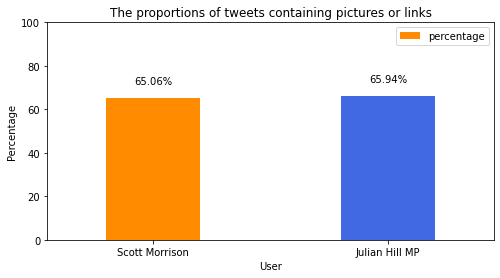

In [25]:
colors = ['royalblue' if (x == 'Julian Hill MP') else 'darkorange' for x in media_prob_true['user']]
ax = media_prob_true.plot(kind='bar', x='user', y= 'percentage', figsize=(8,4), width=0.4, rot=0, color=colors)
for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy() 
    ax.annotate(f'{height.round(2)}%', (x + width/2, y + height*1.1), ha='center')
ax.set_ylim(0, 100)
ax.set_title('The proportions of tweets containing pictures or links')
ax.set_ylabel('Percentage')
ax.set_xlabel('User')

Julian Hill and Scott Morrison have similar proportions of tweets containing pictures or links which is around 65% of all tweets

**Task 4** Use pandas to construct a histogram of the number of hashtags in tweets for each of the two users.

__Removing, extracting and counting hashtags of each tweet__

In [26]:
hashtag = re.compile("#(\w+)")
df['text_without_hashtags'] = df['text_without_links'].apply(lambda x: hashtag.sub(r'', x))
df['hashtags'] = df['full_text'].apply(lambda x: re.findall(r"#(\w+)", x))
df['hashtags_count'] = df['full_text'].apply(lambda x: re.findall(r"#(\w+)", x)).apply((lambda x: len(x)))
df.head(5)

,user,full_text,posting_time,text_without_links,tweet_links,include_links,text_without_hashtags,hashtags,hashtags_count
0,Julian Hill MP,@DougCameron51 @JoshFrydenberg Same level of c...,Sat Oct 16 02:43:22 +0000 2021,@DougCameron51 @JoshFrydenberg Same level of c...,[],False,@DougCameron51 @JoshFrydenberg Same level of c...,[],0
1,Julian Hill MP,So 8 years of failure &amp; missed opportuniti...,Fri Oct 15 20:31:24 +0000 2021,So 8 years of failure &amp; missed opportuniti...,[https://t.co/umIMNafcM2],True,So 8 years of failure &amp; missed opportuniti...,[auspol],1
2,Julian Hill MP,"Ummm, Matty, you do know how that story ends r...",Thu Oct 14 23:49:50 +0000 2021,"Ummm, Matty, you do know how that story ends r...",[https://t.co/WG6qxHRRhI],True,"Ummm, Matty, you do know how that story ends r...",[auspol],1
3,Julian Hill MP,"@mattjcan Ummm, you do know how that story end...",Thu Oct 14 23:44:18 +0000 2021,"@mattjcan Ummm, you do know how that story end...",[],False,"@mattjcan Ummm, you do know how that story end...",[auspol],1
4,Julian Hill MP,How many tools can you count in this photo? ht...,Thu Oct 14 21:54:55 +0000 2021,How many tools can you count in this photo?,[https://t.co/Bk7cMCoWsG],True,How many tools can you count in this photo?,[],0


__Creating new df to calculate hashtag frequency of each user__

In [27]:
hashtags_JH = df[df['user'] == 'Julian Hill MP']
hashtags_JH = hashtags_JH['hashtags_count'].value_counts().sort_index().to_frame('JulianHill')
hashtags_JH['hashtags_count'] = hashtags_JH.index
hashtags_JH = hashtags_JH[['hashtags_count', 'JulianHill']]
hashtags_JH.reset_index(drop=True, inplace=True)
hashtags_JH

,hashtags_count,JulianHill
0,0,49
1,1,38
2,2,26
3,3,10
4,4,12
5,5,2
6,6,1


In [28]:
hashtags_SM = df[df['user'] == 'Scott Morrison']
hashtags_SM = hashtags_SM['hashtags_count'].value_counts().sort_index().to_frame('ScottMorrison')
hashtags_SM['hashtags_count'] = hashtags_SM.index
hashtags_SM = hashtags_SM[['hashtags_count', 'ScottMorrison']]
hashtags_SM.reset_index(drop=True, inplace=True)
hashtags_SM

,hashtags_count,ScottMorrison
0,0,112
1,1,45
2,2,7
3,3,2


In [29]:
all_hashtags = pd.merge(hashtags_JH, hashtags_SM, on = ['hashtags_count'], how = 'outer')
all_hashtags.fillna(0, inplace=True)
all_hashtags['JulianHill'] = all_hashtags['JulianHill']. astype(int)
all_hashtags['ScottMorrison'] = all_hashtags['ScottMorrison']. astype(int)
all_hashtags.set_index('hashtags_count', inplace=True)
all_hashtags = all_hashtags.sort_index()
all_hashtags

,JulianHill,ScottMorrison
hashtags_count,,
0,49,112
1,38,45
2,26,7
3,10,2
4,12,0
5,2,0
6,1,0


__Preparing dataframe for ploting a histogram of hashtags frequency of each user__

In [30]:
hashtags_JH = df[df['user'] == 'Julian Hill MP']
hashtags_JH = hashtags_JH['hashtags_count']
#hashtags_JH
hashtags_SM = df[df['user'] == 'Scott Morrison']
hashtags_SM = hashtags_SM['hashtags_count']
#hashtags_SM

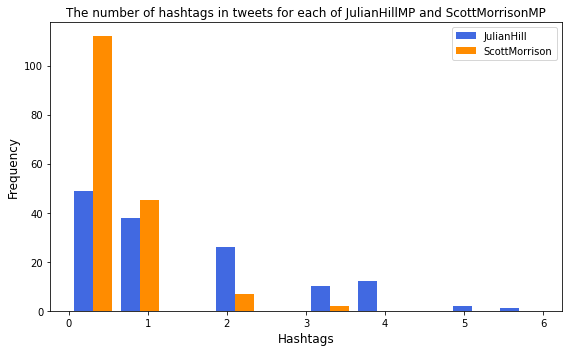

In [31]:
colors = ['royalblue', 'darkorange']
plt.figure(figsize=(8,5))
plt.hist([hashtags_JH, hashtags_SM], label=['JulianHill', 'ScottMorrison'], bins = 10, color=colors)
plt.title('The number of hashtags in tweets for each of JulianHillMP and ScottMorrisonMP', fontsize = 12)
plt.xlabel('Hashtags', fontsize = 12)
plt.ylabel('Frequency', fontsize = 12)
plt.legend(loc='upper right')
plt.tight_layout()

It turns out that more than half of all Scott Morrison's tweets were without the hashtags and he didn't use hashtags more than 3 hashtags per tweet. Most of Julian Hill's tweets also didn't put the hashtags on his tweets. For the tweets with the hashtag, Julian Hill often used one or two hashtags per tweet and his maximum hashtags per tweet were 6 hashtags.

**Task 5** Calculate the log odds ratio (check here for an example) for each word used in the set of tweets, and list the 20 words most strongly associated with each of the two users.

In [32]:
df.head(5)

,user,full_text,posting_time,text_without_links,tweet_links,include_links,text_without_hashtags,hashtags,hashtags_count
0,Julian Hill MP,@DougCameron51 @JoshFrydenberg Same level of c...,Sat Oct 16 02:43:22 +0000 2021,@DougCameron51 @JoshFrydenberg Same level of c...,[],False,@DougCameron51 @JoshFrydenberg Same level of c...,[],0
1,Julian Hill MP,So 8 years of failure &amp; missed opportuniti...,Fri Oct 15 20:31:24 +0000 2021,So 8 years of failure &amp; missed opportuniti...,[https://t.co/umIMNafcM2],True,So 8 years of failure &amp; missed opportuniti...,[auspol],1
2,Julian Hill MP,"Ummm, Matty, you do know how that story ends r...",Thu Oct 14 23:49:50 +0000 2021,"Ummm, Matty, you do know how that story ends r...",[https://t.co/WG6qxHRRhI],True,"Ummm, Matty, you do know how that story ends r...",[auspol],1
3,Julian Hill MP,"@mattjcan Ummm, you do know how that story end...",Thu Oct 14 23:44:18 +0000 2021,"@mattjcan Ummm, you do know how that story end...",[],False,"@mattjcan Ummm, you do know how that story end...",[auspol],1
4,Julian Hill MP,How many tools can you count in this photo? ht...,Thu Oct 14 21:54:55 +0000 2021,How many tools can you count in this photo?,[https://t.co/Bk7cMCoWsG],True,How many tools can you count in this photo?,[],0


In [33]:
print(df['full_text'][1])
print('*******************************************')
print(df['text_without_links'][1])
print('*******************************************')
print(df['text_without_hashtags'][1])

So 8 years of failure &amp; missed opportunities - 21 failed climate policies already - isn’t long enough?
#auspol https://t.co/umIMNafcM2
*******************************************
So 8 years of failure &amp; missed opportunities - 21 failed climate policies already - isn’t long enough?
#auspol 
*******************************************
So 8 years of failure &amp; missed opportunities - 21 failed climate policies already - isn’t long enough?
 


__Cleaning tweets__


In [34]:
cols = ['user', 'text_without_hashtags']
df2=df[cols]
df2.head(5)

,user,text_without_hashtags
0,Julian Hill MP,@DougCameron51 @JoshFrydenberg Same level of c...
1,Julian Hill MP,So 8 years of failure &amp; missed opportuniti...
2,Julian Hill MP,"Ummm, Matty, you do know how that story ends r..."
3,Julian Hill MP,"@mattjcan Ummm, you do know how that story end..."
4,Julian Hill MP,How many tools can you count in this photo?


__Removing, extracting emails and metions from each tweet__

In [35]:
df2['mentions'] = df['full_text'].apply(lambda x: re.findall(r'\S*@\S*\s?', x))
df2['text_without_mentions'] = df2['text_without_hashtags'].apply(lambda x: re.sub('\S*@\S*\s?', '',x))
df2['mentions_count'] = df2['text_without_hashtags'].apply(lambda x: re.findall(r"@[^\s]+", x)).apply((lambda x: len(x)))
df2.head(5)

,user,text_without_hashtags,mentions,text_without_mentions,mentions_count
0,Julian Hill MP,@DougCameron51 @JoshFrydenberg Same level of c...,"[@DougCameron51 , @JoshFrydenberg ]",Same level of courage as Peter Costello. But a...,2
1,Julian Hill MP,So 8 years of failure &amp; missed opportuniti...,[],So 8 years of failure &amp; missed opportuniti...,0
2,Julian Hill MP,"Ummm, Matty, you do know how that story ends r...",[],"Ummm, Matty, you do know how that story ends r...",0
3,Julian Hill MP,"@mattjcan Ummm, you do know how that story end...",[@mattjcan ],"Ummm, you do know how that story ends right? \n",1
4,Julian Hill MP,How many tools can you count in this photo?,[],How many tools can you count in this photo?,0


In [36]:
df2[df2['mentions_count'] > 1].head(5)

,user,text_without_hashtags,mentions,text_without_mentions,mentions_count
0,Julian Hill MP,@DougCameron51 @JoshFrydenberg Same level of c...,"[@DougCameron51 , @JoshFrydenberg ]",Same level of courage as Peter Costello. But a...,2
14,Julian Hill MP,@sohifee90 Email me at Julian.Hill.MP@aph.gov.au,"[@sohifee90 , Julian.Hill.MP@aph.gov.au]",Email me at,2
15,Julian Hill MP,@GrumpySevant @davidbewart Email me at Julian....,"[@GrumpySevant , @davidbewart , Julian.Hill.MP...",Email me at,3
17,Julian Hill MP,@CottonPru If you want to get involved email m...,"[@CottonPru , Julian.Hill.MP@aph.gov.au]",If you want to get involved email me at,2
23,Julian Hill MP,@bimmyjartel @PaulRob11880584 👋🏼,"[@bimmyjartel , @PaulRob11880584 ]",👋🏼,2


__Removing, extracting emoji from each tweet__

In [37]:
#Code for cleaning emoji from each tweet is from 
#https://stackoverflow.com/questions/33404752/removing-emojis-from-a-string-in-python
emoji_pattern = re.compile("["
        u"\U0001F600-\U0001F64F"  # emoticons
        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # transport & map symbols
        u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
        u"\U00002500-\U00002BEF"  # chinese char
        u"\U00002702-\U000027B0"
        u"\U00002702-\U000027B0"
        u"\U000024C2-\U0001F251"
        u"\U0001f926-\U0001f937"
        u"\U00010000-\U0010ffff"
        u"\u2640-\u2642" 
        u"\u2600-\u2B55"
        u"\u200d"
        u"\u23cf"
        u"\u23e9"
        u"\u231a"
        u"\ufe0f"  # dingbats
        u"\u3030"
                           "]+", flags=re.UNICODE)
df2['text_without_emoji'] = df2['text_without_mentions'].apply(lambda x: emoji_pattern.sub(r'', x))
df2.head(5)

,user,text_without_hashtags,mentions,text_without_mentions,mentions_count,text_without_emoji
0,Julian Hill MP,@DougCameron51 @JoshFrydenberg Same level of c...,"[@DougCameron51 , @JoshFrydenberg ]",Same level of courage as Peter Costello. But a...,2,Same level of courage as Peter Costello. But a...
1,Julian Hill MP,So 8 years of failure &amp; missed opportuniti...,[],So 8 years of failure &amp; missed opportuniti...,0,So 8 years of failure &amp; missed opportuniti...
2,Julian Hill MP,"Ummm, Matty, you do know how that story ends r...",[],"Ummm, Matty, you do know how that story ends r...",0,"Ummm, Matty, you do know how that story ends r..."
3,Julian Hill MP,"@mattjcan Ummm, you do know how that story end...",[@mattjcan ],"Ummm, you do know how that story ends right? \n",1,"Ummm, you do know how that story ends right? \n"
4,Julian Hill MP,How many tools can you count in this photo?,[],How many tools can you count in this photo?,0,How many tools can you count in this photo?


__Converting all words to lowercase__

In [38]:
df2['cleaned_tweets'] = df2['text_without_emoji'].apply(lambda x: re.sub(r'\w', lambda m: m.group(0).lower(),x))
df2['cleaned_tweets'].head(5)

0    same level of courage as peter costello. but a...
1    so 8 years of failure &amp; missed opportuniti...
2    ummm, matty, you do know how that story ends r...
3      ummm, you do know how that story ends right? \n
4         how many tools can you count in this photo? 
Name: cleaned_tweets, dtype: object

__Extracting words from sentences__

In [39]:
import string

word_list= df2['cleaned_tweets'].apply(lambda x: re.sub('['+string.punctuation+']', '', x).split(), x)
word_list.head(5)

0    [same, level, of, courage, as, peter, costello...
1    [so, 8, years, of, failure, amp, missed, oppor...
2    [ummm, matty, you, do, know, how, that, story,...
3    [ummm, you, do, know, how, that, story, ends, ...
4    [how, many, tools, can, you, count, in, this, ...
Name: cleaned_tweets, dtype: object

In [40]:
#Create df from lists
user= df2['user']
cols = ['user', 'word_list']
data = list(zip(user, word_list))
tweets = pd.DataFrame(data, columns=cols)
print(tweets.head(5))
print(tweets.tail(5))

             user                                          word_list
0  Julian Hill MP  [same, level, of, courage, as, peter, costello...
1  Julian Hill MP  [so, 8, years, of, failure, amp, missed, oppor...
2  Julian Hill MP  [ummm, matty, you, do, know, how, that, story,...
3  Julian Hill MP  [ummm, you, do, know, how, that, story, ends, ...
4  Julian Hill MP  [how, many, tools, can, you, count, in, this, ...
               user                                          word_list
299  Scott Morrison  [excellent, meeting, virtually, with, our, pac...
300  Scott Morrison  [this, is, a, well, worth, a, watch, professor...
301  Scott Morrison  [thank, you, once, again, to, the, people, of,...
302  Scott Morrison  [had, a, warm, discussion, with, chancellor, m...
303  Scott Morrison  [the, coming, days, will, be, difficult, for, ...


In [41]:
tweets_JH = tweets[tweets['user']=='Julian Hill MP']
tweets_JH = tweets_JH.reset_index(drop=True)
#Creating list of words of Julian Hill
JH_words=tweets_JH['word_list']
JH_words.head(5)

0    [same, level, of, courage, as, peter, costello...
1    [so, 8, years, of, failure, amp, missed, oppor...
2    [ummm, matty, you, do, know, how, that, story,...
3    [ummm, you, do, know, how, that, story, ends, ...
4    [how, many, tools, can, you, count, in, this, ...
Name: word_list, dtype: object

In [42]:
tweets_SM = tweets[tweets['user']=='Scott Morrison']
tweets_SM = tweets_SM.reset_index(drop=True)
#Creating list of words of Scott Morrison
SM_words=tweets_SM['word_list']
SM_words.head(5)

0    [we, are, thinking, of, you, here, in, austral...
1    [shocked, amp, terribly, saddened, by, the, aw...
2    [warm, congrats, japanese, pm, kishida, great,...
3    [australia, and, india, are, great, friends, o...
4    [great, to, meet, with, australian, indian, me...
Name: word_list, dtype: object

__Removing stop words with NLTK__

In [43]:
import nltk
from nltk.corpus import stopwords

stop_words = set(stopwords.words('english'))

JH_wordlist = []
for tweet in JH_words:
    for w in tweet:
        if w not in stopwords.words("english"):
            JH_wordlist.append(w)
            
SM_wordlist = []
for tweet in SM_words:
    for w in tweet:
        if w not in stopwords.words("english"):
            SM_wordlist.append(w)
#SM_wordlist

__Counting word frequency__

In [44]:
from collections import Counter

#Counting word frequency
countsJH = Counter(JH_wordlist)

#Converting dictionary object to df
counts_JH = pd.DataFrame.from_dict(countsJH, orient='index').reset_index()
counts_JH = counts_JH.rename(columns={'index':'word', 0:'JH_freq'})
counts_JH['user'] = 'Julian Hill MP'

#Calculating total words from Julian Hill's tweets
counts_JH['JH_total'] = counts_JH['JH_freq'].sum()

#Sorting df by word frequency and selecting the most 20 frequency words of Julian Hill's tweets
sorted_JH = counts_JH.sort_values(by=['JH_freq'], ascending = [False])[:20]
sorted_JH

,word,JH_freq,user,JH_total
17,amp,42,Julian Hill MP,1754
88,morrison,41,Julian Hill MP,1754
147,scott,30,Julian Hill MP,1754
164,vaccines,14,Julian Hill MP,1754
126,morrison’s,14,Julian Hill MP,1754
138,get,13,Julian Hill MP,1754
54,government,12,Julian Hill MP,1754
143,it’s,12,Julian Hill MP,1754
21,failed,11,Julian Hill MP,1754
271,lockdowns,11,Julian Hill MP,1754


In [45]:
#Counting word frequency
countsSM = Counter(SM_wordlist)

#Converting dictionary object to df
counts_SM = pd.DataFrame.from_dict(countsSM, orient='index').reset_index()
counts_SM = counts_SM.rename(columns={'index':'word', 0:'SM_freq'})
counts_SM['user'] = 'Scott Morrison'

#Calculating total words from Scott Morrison's tweets
counts_SM['SM_total'] = counts_SM['SM_freq'].sum()

#Sorting df by word frequency and selecting the most 20 frequency words of Scott Morrison's tweets
sorted_SM = counts_SM.sort_values(by=['SM_freq'], ascending = [False])[:20]
sorted_SM

,word,SM_freq,user,SM_total
1,australia,67,Scott Morrison,3528
5,amp,66,Scott Morrison,3528
120,australians,33,Scott Morrison,3528
79,today,31,Scott Morrison,3528
34,great,30,Scott Morrison,3528
62,new,27,Scott Morrison,3528
107,first,23,Scott Morrison,3528
162,vaccine,22,Scott Morrison,3528
140,get,22,Scott Morrison,3528
32,pm,21,Scott Morrison,3528


__Merging sorted_JH and sorted_SM tables into one df__

In [46]:
top20 = pd.merge(sorted_JH, sorted_SM, on='word', how='outer')
top20

,word,JH_freq,user_x,JH_total,SM_freq,user_y,SM_total
0,amp,42.0,Julian Hill MP,1754.0,66.0,Scott Morrison,3528.0
1,morrison,41.0,Julian Hill MP,1754.0,NaN,NaN,NaN
2,scott,30.0,Julian Hill MP,1754.0,NaN,NaN,NaN
3,vaccines,14.0,Julian Hill MP,1754.0,NaN,NaN,NaN
4,morrison’s,14.0,Julian Hill MP,1754.0,NaN,NaN,NaN
5,get,13.0,Julian Hill MP,1754.0,22.0,Scott Morrison,3528.0
6,government,12.0,Julian Hill MP,1754.0,NaN,NaN,NaN
7,it’s,12.0,Julian Hill MP,1754.0,NaN,NaN,NaN
8,failed,11.0,Julian Hill MP,1754.0,NaN,NaN,NaN
9,lockdowns,11.0,Julian Hill MP,1754.0,NaN,NaN,NaN


__Dealing with Null value__

In [47]:
#Dropping unused columns
top20.drop(['user_x', 'user_y'], axis=1, inplace=True)

#Filling NaN values with 0 for freq_x and freq_y
top20['JH_freq'] = top20['JH_freq'].fillna(0)
top20['SM_freq'] = top20['SM_freq'].fillna(0)

#Filling JH_total and SM_total with forward value
top20.fillna(method='ffill', inplace=True)
top20

,word,JH_freq,JH_total,SM_freq,SM_total
0,amp,42.0,1754.0,66.0,3528.0
1,morrison,41.0,1754.0,0.0,3528.0
2,scott,30.0,1754.0,0.0,3528.0
3,vaccines,14.0,1754.0,0.0,3528.0
4,morrison’s,14.0,1754.0,0.0,3528.0
5,get,13.0,1754.0,22.0,3528.0
6,government,12.0,1754.0,0.0,3528.0
7,it’s,12.0,1754.0,0.0,3528.0
8,failed,11.0,1754.0,0.0,3528.0
9,lockdowns,11.0,1754.0,0.0,3528.0


__Calculating log odds ratio__

In [48]:
top20['ratio_JH'] = [i+1 / j+1 for i,j in zip(top20['JH_freq'], top20['JH_total'])]
top20['ratio_SM'] = [i+1 / j+1 for i,j in zip(top20['SM_freq'], top20['SM_total'])]
top20['odds_ratio'] = [i/j for i,j in zip(top20['ratio_JH'], top20['ratio_SM'])]
top20['log'] = np.log2(top20['odds_ratio'])
top20

,word,JH_freq,JH_total,SM_freq,SM_total,ratio_JH,ratio_SM,odds_ratio,log
0,amp,42.0,1754.0,66.0,3528.0,43.00057,67.000283,0.641797,-0.639811
1,morrison,41.0,1754.0,0.0,3528.0,42.00057,1.000283,41.988669,5.391928
2,scott,30.0,1754.0,0.0,3528.0,31.00057,1.000283,30.991786,4.953814
3,vaccines,14.0,1754.0,0.0,3528.0,15.00057,1.000283,14.996319,3.906537
4,morrison’s,14.0,1754.0,0.0,3528.0,15.00057,1.000283,14.996319,3.906537
5,get,13.0,1754.0,22.0,3528.0,14.00057,23.000283,0.608713,-0.716166
6,government,12.0,1754.0,0.0,3528.0,13.00057,1.000283,12.996886,3.700094
7,it’s,12.0,1754.0,0.0,3528.0,13.00057,1.000283,12.996886,3.700094
8,failed,11.0,1754.0,0.0,3528.0,12.00057,1.000283,11.997170,3.584622
9,lockdowns,11.0,1754.0,0.0,3528.0,12.00057,1.000283,11.997170,3.584622


__Plotting Log Odds Ratio__

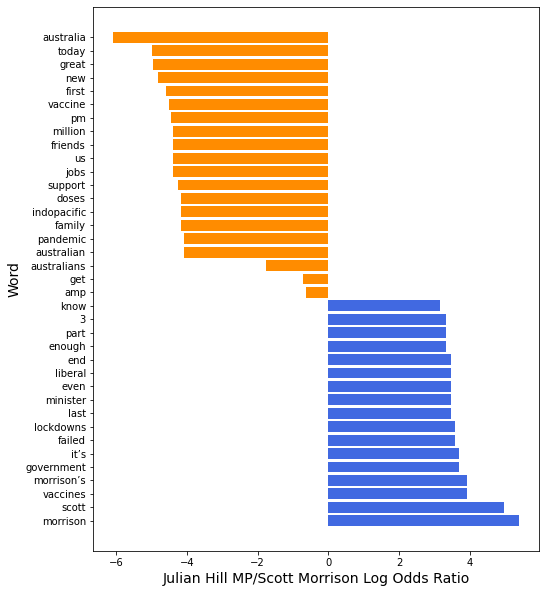

In [49]:
cols = ['word', 'log']
results_df = top20[cols]

new_index = results_df.log.sort_values(ascending = False).index
sorted_results = results_df.reindex(new_index)
filtered_results = sorted_results[np.abs(sorted_results['log']) > 0]

plt.figure(figsize =(8,10))
colors = ['royalblue' if (x > 0) else 'darkorange' for x in filtered_results['log']]
plt.barh(filtered_results['word'], filtered_results['log'], color=colors)
plt.xlabel('Julian Hill MP/Scott Morrison Log Odds Ratio', fontsize = 14)
plt.ylabel('Word', fontsize = 14)
plt.show()

* Most words on Julian Hill tweets mention to Scott Morrison and government as well as negative emotion words such as 'falied', 'enough'.
* A lot of words from Scott Morrison's tweets are related to Australia and Covid-Pandemic such as 'vaccine', 'doses', 'pandamic', 'australia' and 'australian'.
* Words like 'amp', 'get' and 'australians' are from both Julian Hill and Scott Morrison.

**Task 6** Use the vaderSentiment module to calculate the sentiment of each tweet, and then for each of the two users, calculate the average 'compound' sentiment for all their tweets.

In [50]:
#Creating new df for the vaderSentiment task
cols = ['user','text_without_mentions']
df3 = df2[cols]
df3 = df3.rename(columns={'text_without_mentions': 'vadertext'})
df3.head(5)

,user,vadertext
0,Julian Hill MP,Same level of courage as Peter Costello. But a...
1,Julian Hill MP,So 8 years of failure &amp; missed opportuniti...
2,Julian Hill MP,"Ummm, Matty, you do know how that story ends r..."
3,Julian Hill MP,"Ummm, you do know how that story ends right? \n"
4,Julian Hill MP,How many tools can you count in this photo?


__Calculating the sentiment of each tweet__

In [51]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

valence_score = []
compound = []
analyzer = SentimentIntensityAnalyzer()
for sentence in df3['vadertext']:
    vs = analyzer.polarity_scores(sentence)
    #print("{:-<65} {}".format(sentence, str(vs))) 
    #print("{:-<65} {}".format(sentence, str(vs['compound']))) 
    valence_score.append(vs)
    compound.append(vs['compound'])
df3['valence_score'] = valence_score
df3['compound'] = compound
df3.head(5)

,user,vadertext,valence_score,compound
0,Julian Hill MP,Same level of courage as Peter Costello. But a...,"{'neg': 0.36, 'neu': 0.548, 'pos': 0.092, 'com...",-0.9223
1,Julian Hill MP,So 8 years of failure &amp; missed opportuniti...,"{'neg': 0.346, 'neu': 0.551, 'pos': 0.102, 'co...",-0.7351
2,Julian Hill MP,"Ummm, Matty, you do know how that story ends r...","{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000
3,Julian Hill MP,"Ummm, you do know how that story ends right? \n","{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000
4,Julian Hill MP,How many tools can you count in this photo?,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000


__Calculate the average 'compound'__

In [52]:
#The average 'compound' sentiment for all their tweets
df3.groupby('user')['compound'].mean()

user
Julian Hill MP   -0.029669
Scott Morrison    0.502165
Name: compound, dtype: float64

* Julian Hill's tweets have a neutral sentiment with an average compound score of -0.029669.
* Scott Morrison's tweets have positive sentiment with an average compound score of 0.502165.
